# Image Segmentation and Clustering Techniques for Effective Barcode Scanning

In this notebook, we will demonstrate several image processing techniques including **barcode detection**, **adaptive thresholding**, **clustering methods**, and **segmentation**. The goal is to show how different techniques can be applied to images and how to use clustering for segmentation tasks. We will also integrate barcode detection and assess its accuracy using ruler-based visual aids.


## Importing Libraries
The following libraries are required for this notebook:
1. **OpenCV**: For image processing and transformations.
2. **NumPy**: To handle numerical operations and coordinate systems.
3. **Matplotlib**: To display images.
4. **Pyzbar**: To detect and decode barcodes.

Make sure the libraries are installed. You can install them using:

```bash
pip install opencv-python-headless numpy matplotlib pyzba

**Step 1: Image Loading and Barcode Detection** <br>  <br>  Load the image and detect any barcodes present. We will use the `pyzbar` library to identify barcodes, draw bounding boxes around them, and calculate detection accuracy. We will also display rulers (X, Y axes) to help visualize the image dimensions.

In [1]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pyzbar import pyzbar

# Function to detect and recognize barcodes, and draw rectangles with text
def detectAndRecognizeBarcodes(image, expected_barcodes=1):
    barcodes = pyzbar.decode(image)
    num_detected = len(barcodes)
    
    for barcode in barcodes:
        x, y, w, h = barcode.rect
        barcodeData = barcode.data.decode("utf-8")
        barcodeType = barcode.type

        # Draw rectangle around the barcode
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Put the barcode type and data on the image
        text = f"{barcodeType}: {barcodeData} (Box: {x},{y},{w},{h})"
        cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Assuming a confidence level, print the detected barcode information
        print(f"Detected Barcode: {text} | Confidence: High | Bounding Box: {x},{y},{w},{h}")

    # Calculate the detection accuracy percentage
    accuracy = (num_detected / expected_barcodes) * 100 if expected_barcodes > 0 else 0

    detection_status = "Detected" if num_detected > 0 else "Not Detected"
    return image, detection_status, accuracy

# Function to display the image with barcodes and show X, Y rulers
def showImageWithBarcode(img, title, expected_barcodes=1):
    imgWithBarcodes, detection_status, accuracy = detectAndRecognizeBarcodes(img.copy(), expected_barcodes)
    
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(imgWithBarcodes, cv2.COLOR_BGR2RGB))
    plt.title(f"{title} - Barcode {detection_status} - Accuracy: {accuracy:.2f}%")
    plt.grid(True)  # Display X, Y rulers
    plt.xticks(np.arange(0, imgWithBarcodes.shape[1], step=100))  # Custom X ticks for ruler
    plt.yticks(np.arange(0, imgWithBarcodes.shape[0], step=100))  # Custom Y ticks for ruler
    plt.show()

# Load the image
path = "./Resources/One-DimensionalBarCodes.jpg"
img = cv2.imread(path)

if img is None:
    print("Image not found at the specified path.")
else:
    print("Image loaded successfully.")

Image loaded successfully.


Assume we expect 1 barcode in the image (you can change this based on actual barcode count)
expected_barcodes = 1

Step 1: Original Image
Detected Barcode: CODE39: 3400912345621 (Box: 19,15,0,84) | Confidence: High | Bounding Box: 19,15,0,84


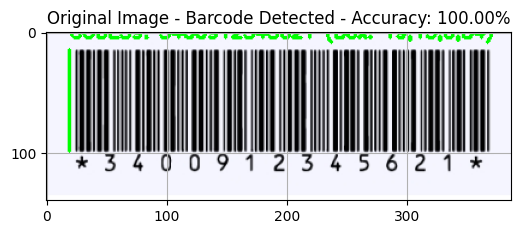

In [2]:
# Assume we expect 1 barcode in the image (you can change this based on actual barcode count)
expected_barcodes = 1

# Step-by-Step Processing and Barcode Detection with Rulers and Accuracy

# Step 1: Original Image
print("Step 1: Original Image")
showImageWithBarcode(img, "Original Image", expected_barcodes)

**Step 2: Adaptive Thresholding (Mean)** <br>  <br> 
In this step, we apply adaptive thresholding using the "Mean" method to segment the image. This method calculates a threshold value for each pixel based on the mean of its neighborhood.

Step 2: Adaptive Thresholding (Mean)


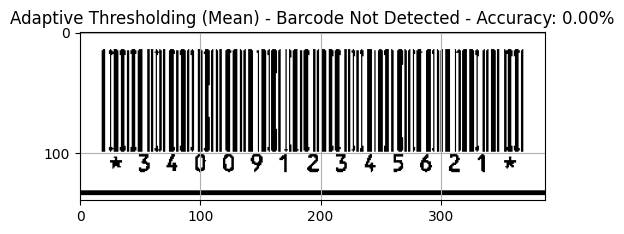

In [3]:
# Step 2: Adaptive Thresholding (Mean)
print("Step 2: Adaptive Thresholding (Mean)")
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgAdaptiveMean = cv2.adaptiveThreshold(imgGray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
showImageWithBarcode(imgAdaptiveMean, "Adaptive Thresholding (Mean)", expected_barcodes)

**Step 3: Adaptive Thresholding (Gaussian)** <br> <br>
Next, we apply the "Gaussian" method for adaptive thresholding, which uses a weighted sum of neighbors in the Gaussian kernel.

Step 3: Adaptive Thresholding (Gaussian)
Detected Barcode: CODE39: 3400912345621 (Box: 19,18,350,79) | Confidence: High | Bounding Box: 19,18,350,79


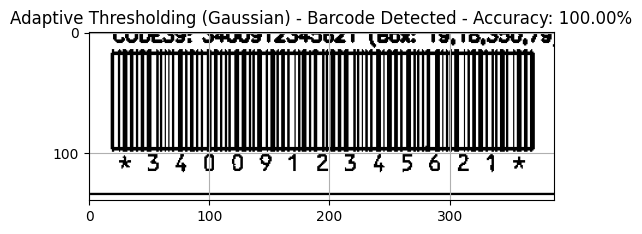

In [4]:
# Step 3: Adaptive Thresholding (Gaussian)
print("Step 3: Adaptive Thresholding (Gaussian)")
imgAdaptiveGaussian = cv2.adaptiveThreshold(imgGray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
showImageWithBarcode(imgAdaptiveGaussian, "Adaptive Thresholding (Gaussian)", expected_barcodes)

**Step 4: K-Means Clustering** <br>  <br> 
In this step, we perform K-Means clustering to segment the image into k regions (we choose k=3 for simplicity). K-Means clusters pixels based on their color similarity.

Step 4: K-Means Clustering
Detected Barcode: CODE39: 3400912345621 (Box: 19,99,0,0) | Confidence: High | Bounding Box: 19,99,0,0


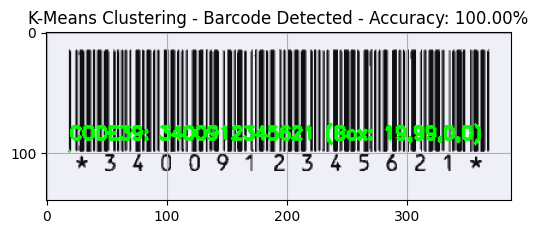

In [5]:
# Step 4: K-Means Clustering
print("Step 4: K-Means Clustering")
Z = img.reshape((-1, 3))
Z = np.float32(Z)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3
_, labels, centers = cv2.kmeans(Z, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
res = centers[labels.flatten()]
imgKMeans = res.reshape((img.shape))
showImageWithBarcode(imgKMeans, "K-Means Clustering", expected_barcodes)

**Step 5: Mean Shift Clustering (Approximated)** <br> <br>
We now perform an approximated Mean Shift clustering using cv2.pyrMeanShiftFiltering, which is a faster, approximate method for segmentation.

Step 5: Mean Shift Clustering (Approximated)
Detected Barcode: CODE39: 3400912345621 (Box: 19,16,350,82) | Confidence: High | Bounding Box: 19,16,350,82


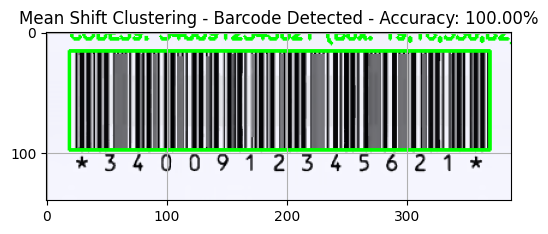

In [6]:
# Step 5: Mean Shift Clustering (approximated with KMeans for simplicity)
print("Step 5: Mean Shift Clustering (Approximated)")
imgMeanShift = cv2.pyrMeanShiftFiltering(img, 21, 51)
showImageWithBarcode(imgMeanShift, "Mean Shift Clustering", expected_barcodes)

**Step 6: Otsu Thresholding**<br> <br>
Otsu's thresholding method automatically calculates the optimal threshold value for binarizing an image by maximizing the between-class variance.

Step 6: Otsu Thresholding
Detected Barcode: CODE39: 3400912345621 (Box: 19,16,350,82) | Confidence: High | Bounding Box: 19,16,350,82


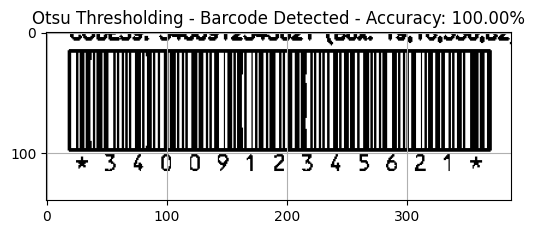

In [7]:
# Step 6: Otsu Thresholding
print("Step 6: Otsu Thresholding")
_, imgOtsu = cv2.threshold(imgGray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
showImageWithBarcode(imgOtsu, "Otsu Thresholding", expected_barcodes)

**Step 7: Region Growing (simplified for demonstration)** <br> <br>
Finally, we demonstrate a simple segmentation technique using connected components. This method groups pixels based on their connectivity.

Step 7: Region Growing (Simplified)
Detected Barcode: CODE39: 3400912345621 (Box: 19,16,350,82) | Confidence: High | Bounding Box: 19,16,350,82


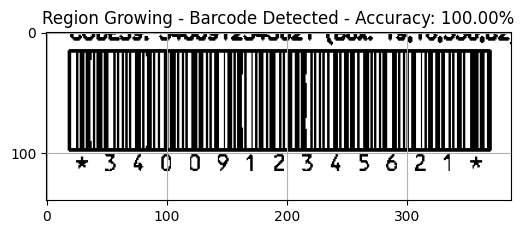

In [8]:
# Step 7: Region Growing (simplified for demonstration)
print("Step 7: Region Growing (Simplified)")
# Example of a simple segmentation using the thresholded image from Otsu
regionGrowing = cv2.connectedComponents(imgOtsu)[1]
showImageWithBarcode(regionGrowing.astype(np.uint8) * 255, "Region Growing", expected_barcodes)


In [9]:
# Final message indicating that all operations are done
print("All image processing operations, including barcode detection, ruler display, and accuracy calculation, are completed.")

All image processing operations, including barcode detection, ruler display, and accuracy calculation, are completed.


 **Conclusion** <br> <br>
All image processing operations, including barcode detection, ruler display, and accuracy calculation, are completed. The various segmentation techniques applied here—adaptive thresholding, K-Means clustering, Mean Shift, Otsu, and Region Growing—demonstrate how different approaches can be used to segment images and detect objects such as barcodes. <br>

This notebook provides a basic workflow for working with image segmentation and clustering while integrating barcode detection into the analysis.